In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [119]:
diabetes = datasets.load_diabetes()

In [120]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

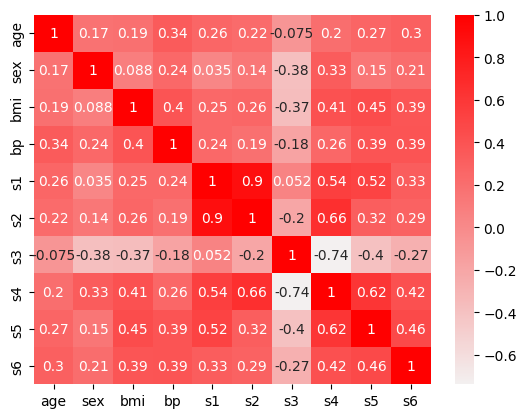

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diabetes=load_diabetes()
X_train,X_test,y_train,y_test= train_test_split(diabetes.data,diabetes.target,test_size=0.2, random_state=0)

model=LinearRegression()
model.fit(X_train,y_train)
df_diabetes=pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df_diabetes.corr()
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(df_diabetes.corr(), annot=True, cmap=cmap)
plt.show()

In [122]:
y_preds = model.predict(X_test)

## sklearn.metrics.mean_squared_error
* sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

In [123]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

3424.316688213735 58.5176613358201 0.3322220326906513


In [124]:
df_diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [125]:
df_diabetes_dr1 = df_diabetes.drop("s4", axis=1)

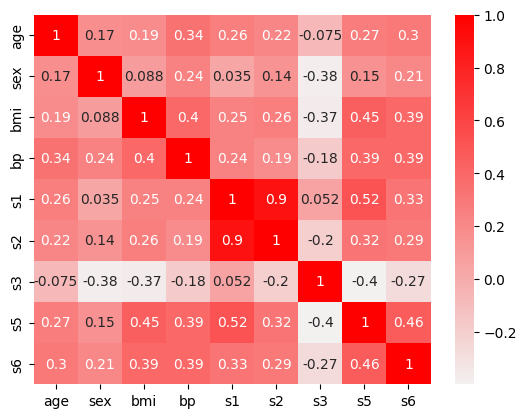

In [126]:
X_train,X_test,y_train,y_test= train_test_split(df_diabetes_dr1,diabetes.target,test_size=0.2, random_state=0)

df_diabetes_dr1.corr()
cmap = sns.light_palette("red", as_cmap=True)
sns.heatmap(df_diabetes_dr1.corr(), annot=True, cmap=cmap)
plt.show()

In [127]:
df_diabetes_dr2 = df_diabetes.drop("s4",axis=1)
df_diabetes_dr2 = df_diabetes_dr2.drop("s2",axis=1)
X_train,X_test,y_train,y_test= train_test_split(df_diabetes_dr2,diabetes.target,test_size=0.2, random_state=0)

In [128]:
model=LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [129]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds))

3466.2218204031456 58.874627985263274 0.32405008875521135


In [130]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_diabetes)
diabetes_scaled = scaler.transform(df_diabetes)
df_scaled = pd.DataFrame(data=diabetes_scaled, columns=diabetes.feature_names)

print(df_scaled.mean())
print(df_scaled.var())

age   -9.544904e-18
sex   -8.389468e-17
bmi    2.411344e-17
bp     2.059690e-17
s1    -5.927888e-17
s2    -5.450642e-17
s3     5.325052e-17
s4     2.717786e-16
s5     2.951385e-18
s6    -2.025152e-17
dtype: float64
age    1.002268
sex    1.002268
bmi    1.002268
bp     1.002268
s1     1.002268
s2     1.002268
s3     1.002268
s4     1.002268
s5     1.002268
s6     1.002268
dtype: float64


In [131]:
X_train,X_test,y_train,y_test= train_test_split(df_scaled,diabetes.target,test_size=0.2, random_state=0)
model=LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [132]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print(mse, rmse, r2_score(y_test, y_preds)) # 원래 3424.316688213735 58.5176613358201 0.3322220326906513

3424.316688213732 58.51766133582008 0.33222203269065187
